# Вычисления к работе 2.2.1
### Удовин Илья, 874

In [1]:
import numpy as np
import pandas as pd
import math
from scipy.optimize import curve_fit
%matplotlib notebook
import matplotlib.pyplot as plt
from IPython.display import display

def create_plot(s1, s2):
    plt.minorticks_on()
    plt.grid(which='major')
    plt.grid(which='minor', linewidth=0.2)
    plt.xlabel(s1)
    plt.ylabel(s2)

<IPython.core.display.Javascript object>


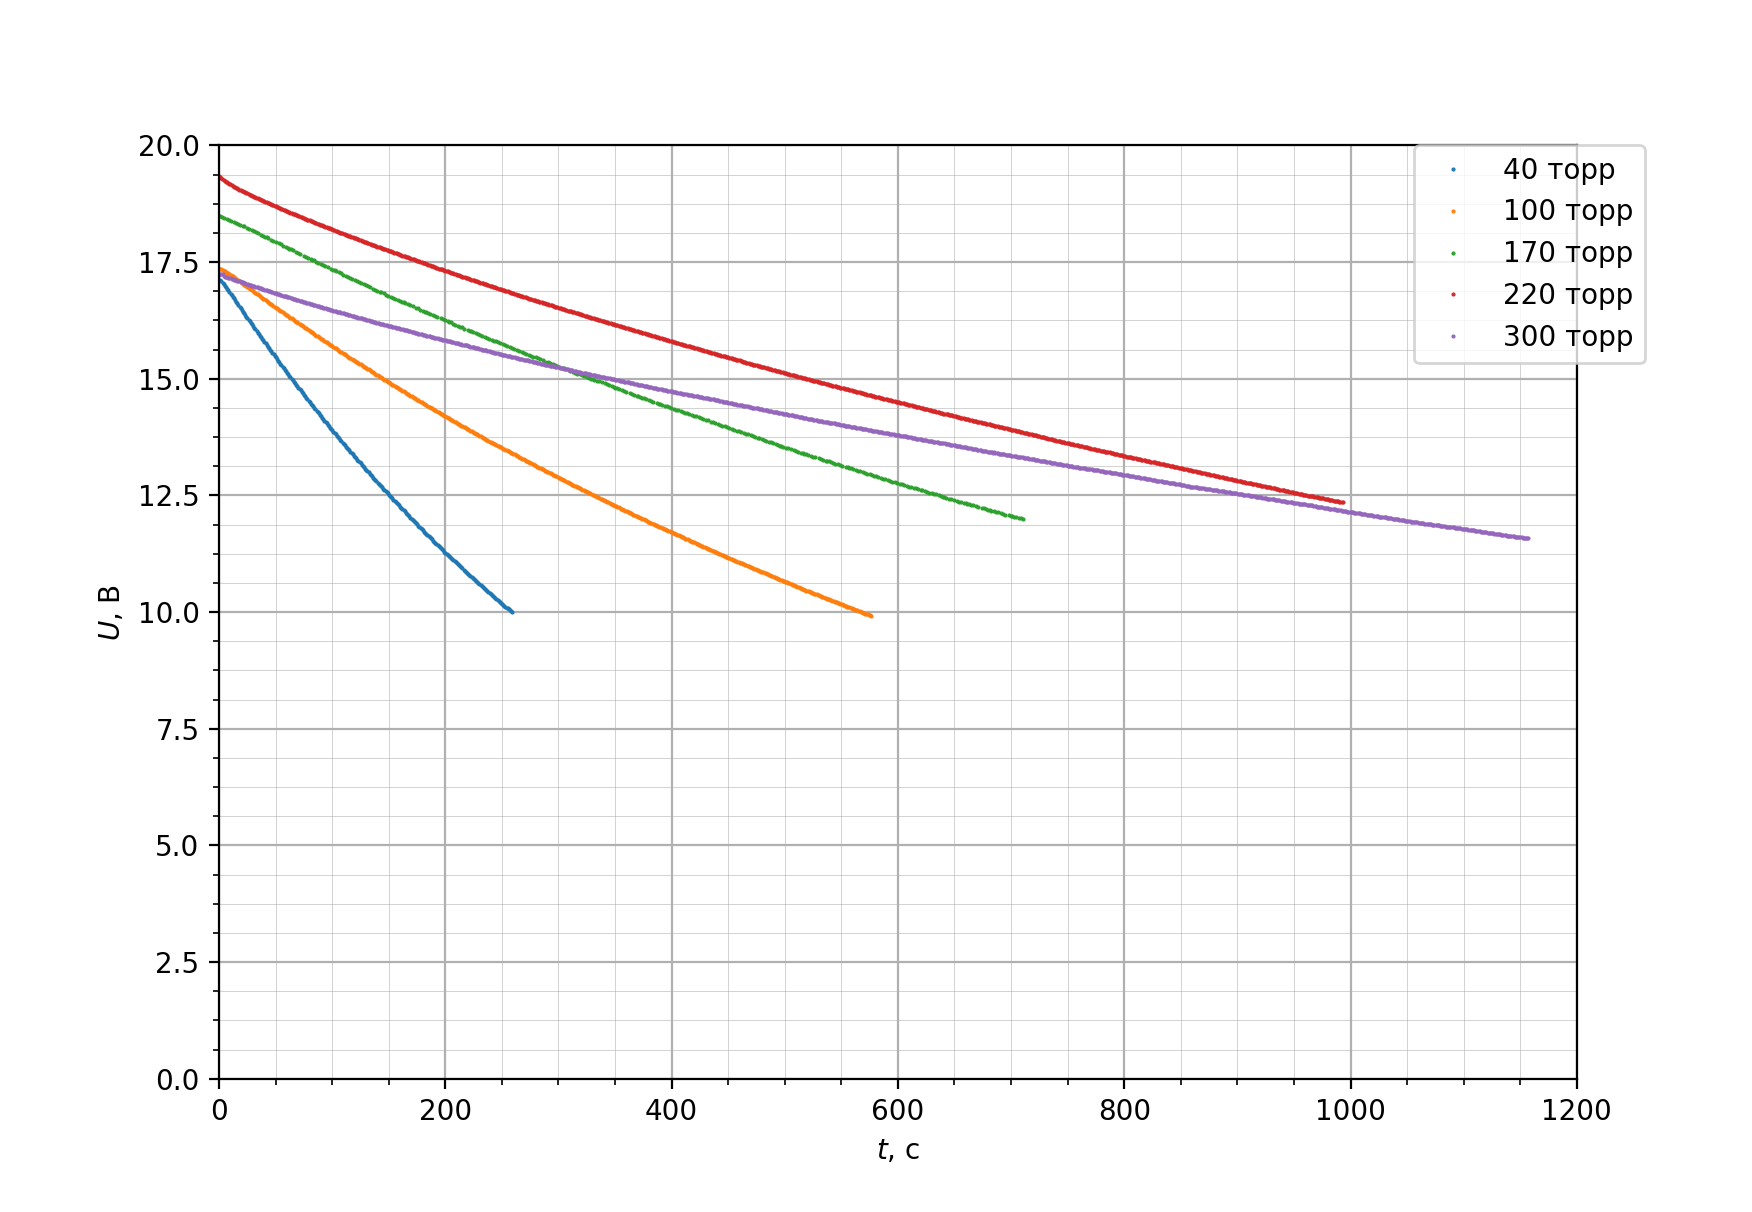

In [2]:
values = [40, 100, 170, 220, 300]
data = []

create_plot('$t$ (c)', '$U$ (мВ)')
plt.xlim(0, 1200)
plt.ylim(0, 20)
for x in values:
    p = pd.read_csv('p' + str(x) + '.csv', header=0)
    p = np.transpose(np.array(p))
    data.append(p)
    plt.plot(p[0], p[1], linestyle='', marker='.', markersize='1', label=(str(x)+' торр'))
plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0)

<IPython.core.display.Javascript object>


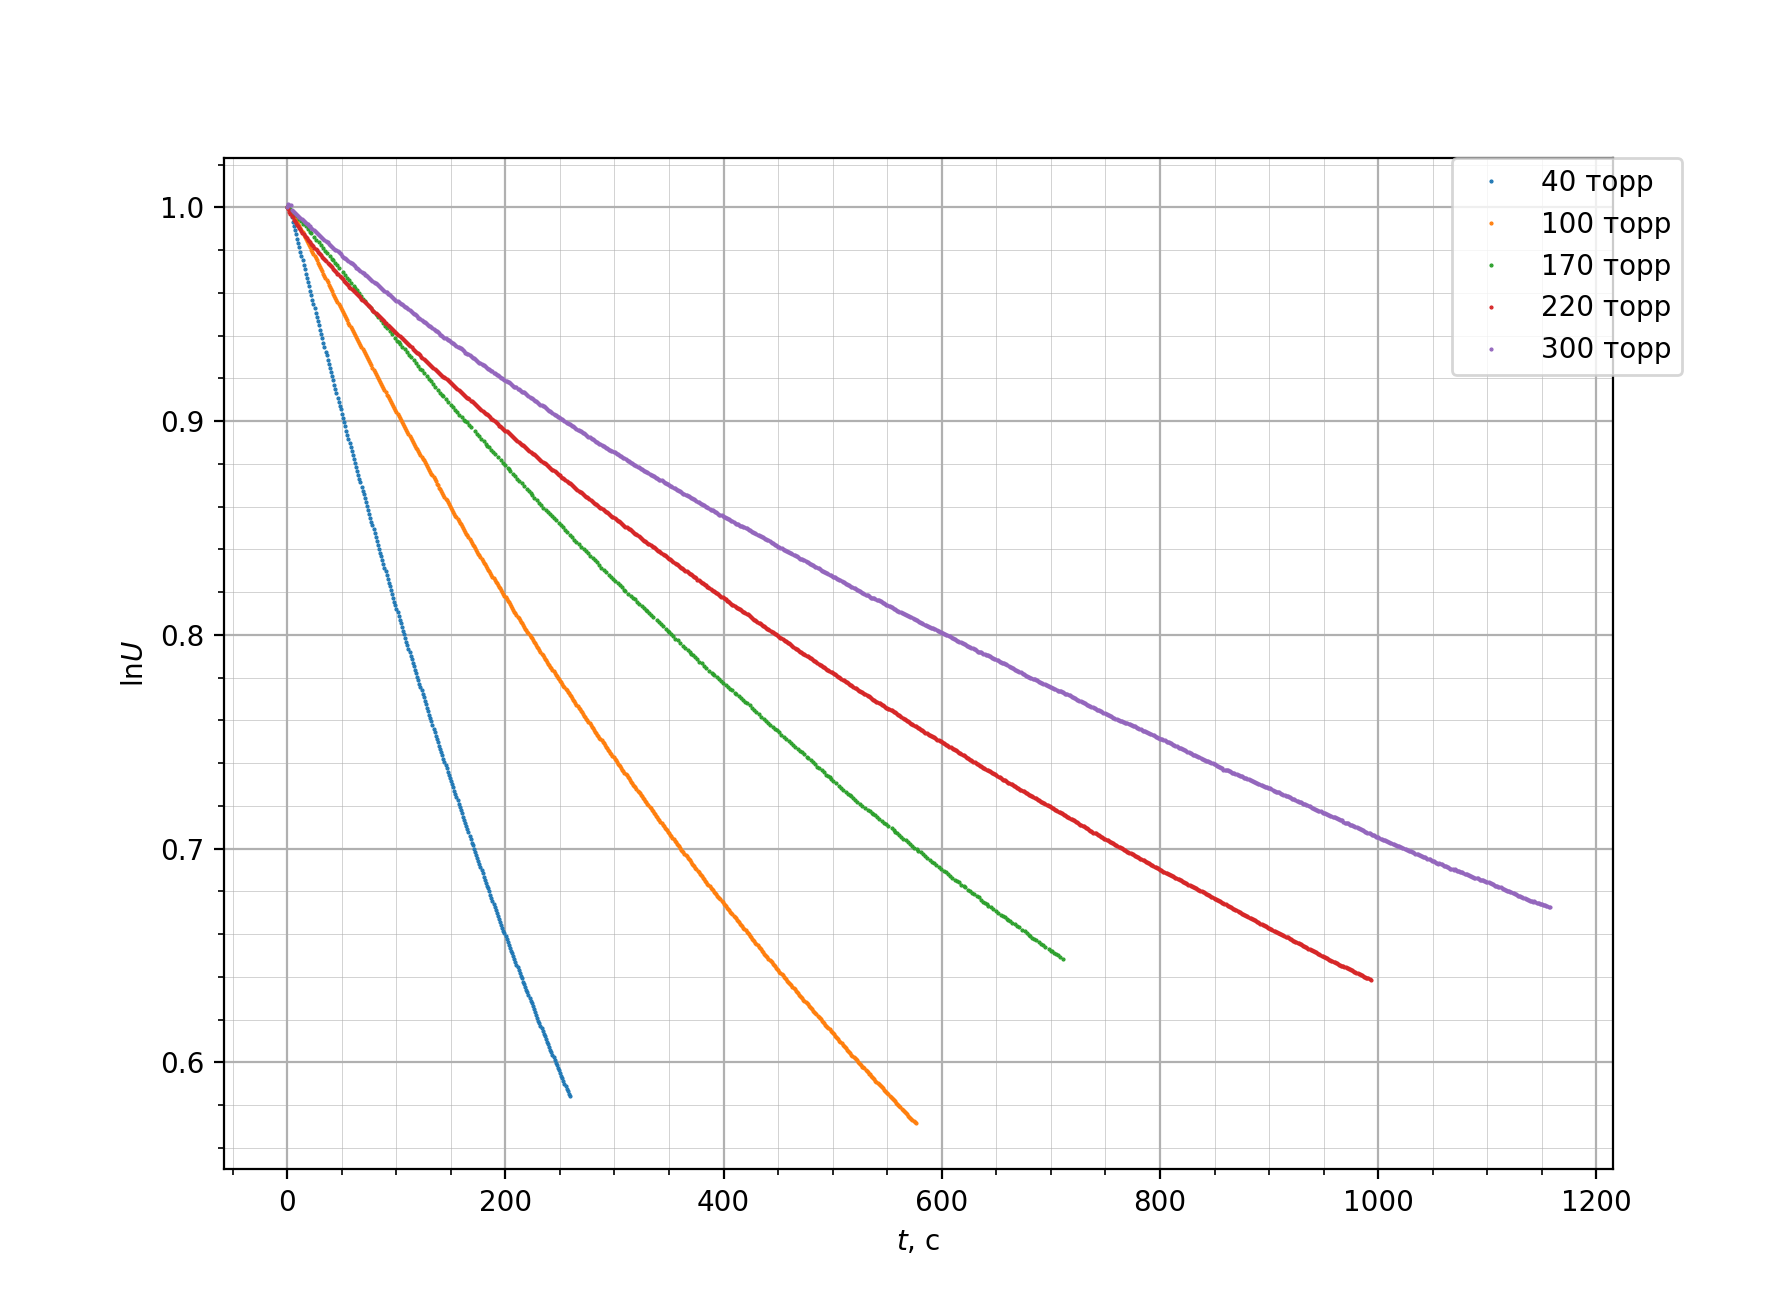

In [3]:
create_plot('$t$ (c)', '$U$ (мВ)')
for i in range(len(data)):
    data[i][1] /= data[i][1][0]
    plt.plot(data[i][0], data[i][1], linestyle='', marker='.', markersize='1', label=(str(values[i])+' торр'))
plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0)

<IPython.core.display.Javascript object>


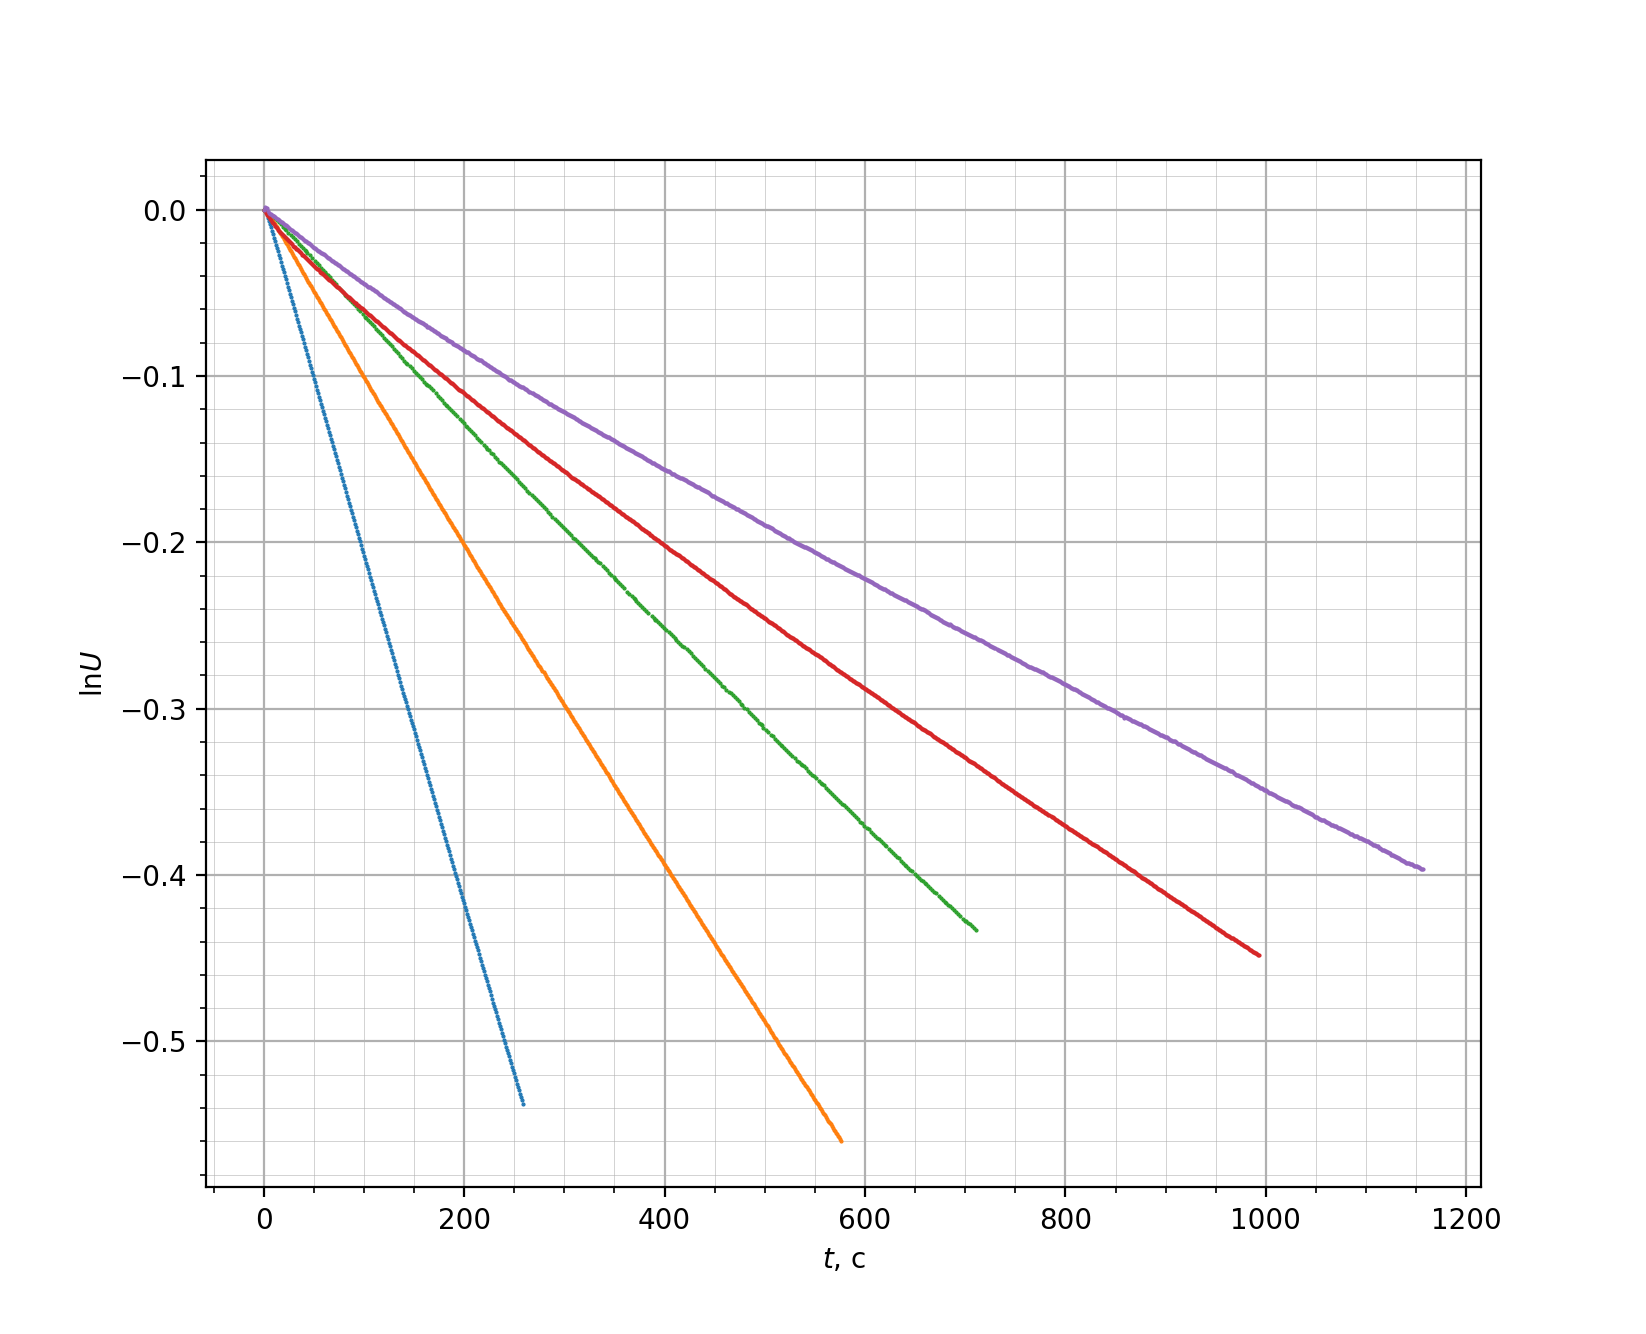

In [4]:
create_plot('$t$ (c)', '$\ln U$')
for d in data:
    plt.plot(d[0], np.log(d[1]), linestyle='', marker='.', markersize='1')

<IPython.core.display.Javascript object>


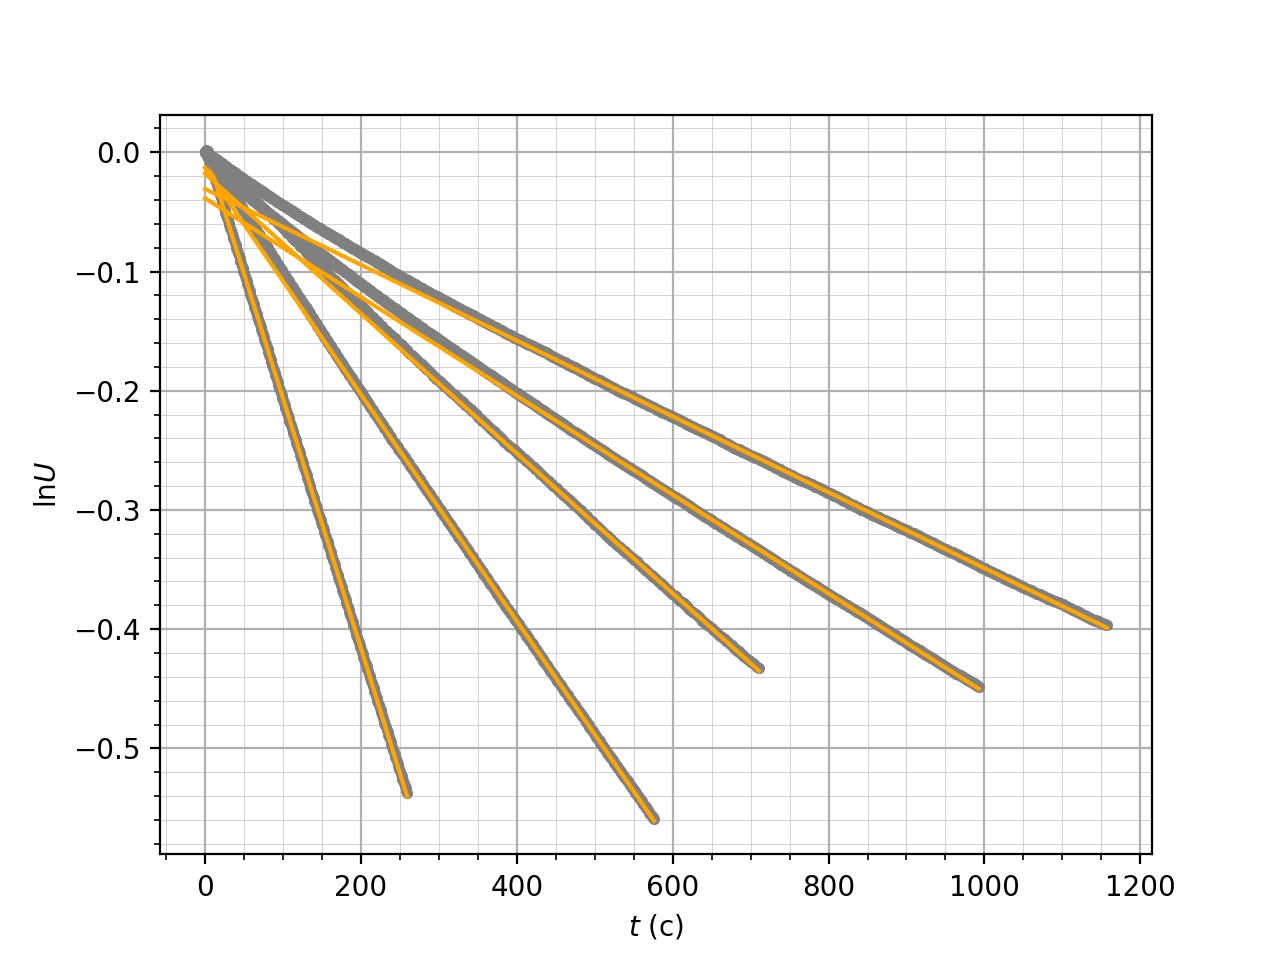

In [21]:
f = lambda x, a, b: a * x + b

data_opt = []
data_cov = []

r = [0, 200, 200, 400, 400]

create_plot('$t$ (c)', '$\ln U$')
for i in range(len(data)):
    d = data[i]
    d_opt, d_cov = curve_fit(f, d[0][r[i]:], np.log(d[1][r[i]:]))
    data_opt.append(d_opt)
    data_cov.append(d_cov)
    plt.plot(d[0], np.log(d[1]), linestyle='', marker='.', color='grey')
    plt.plot(d[0], f(d[0], *d_opt), color='orange')

In [6]:
data_opt, data_cov

([array([-0.00209532,  0.00295767]),
  array([-0.00095105, -0.01281588]),
  array([-0.00058684, -0.01783898]),
  array([-0.00041447, -0.03850723]),
  array([-0.0003181 , -0.03070904])],
 [array([[ 8.15338816e-13, -1.05724766e-10],
         [-1.05724766e-10,  1.83026008e-08]]),
  array([[ 9.27698092e-14, -3.60101012e-11],
         [-3.60101012e-11,  1.50766618e-08]]),
  array([[ 4.98482746e-13, -2.76738579e-10],
         [-2.76738579e-10,  1.57750851e-07]]),
  array([[ 4.39042897e-14, -3.05826885e-11],
         [-3.05826885e-11,  2.25940912e-08]]),
  array([[ 1.77897028e-14, -1.38526965e-11],
         [-1.38526965e-11,  1.16387521e-08]])])

In [7]:
tau = [-1/d[0] for d in data_opt]
tau

[477.2538011454133,
 1051.4689681047073,
 1704.0449806498013,
 2412.699292543854,
 3143.625274079992]

## Далее все считаем в СИ

In [8]:
L_S = 1100 
V = 8e-4 * 2
D = [V * L_S / (2 * t) for t in tau]
D

[0.0018438826425017302,
 0.0008369243664758044,
 0.0005164182929399144,
 0.0003647367090957129,
 0.00027993158321248685]

<IPython.core.display.Javascript object>


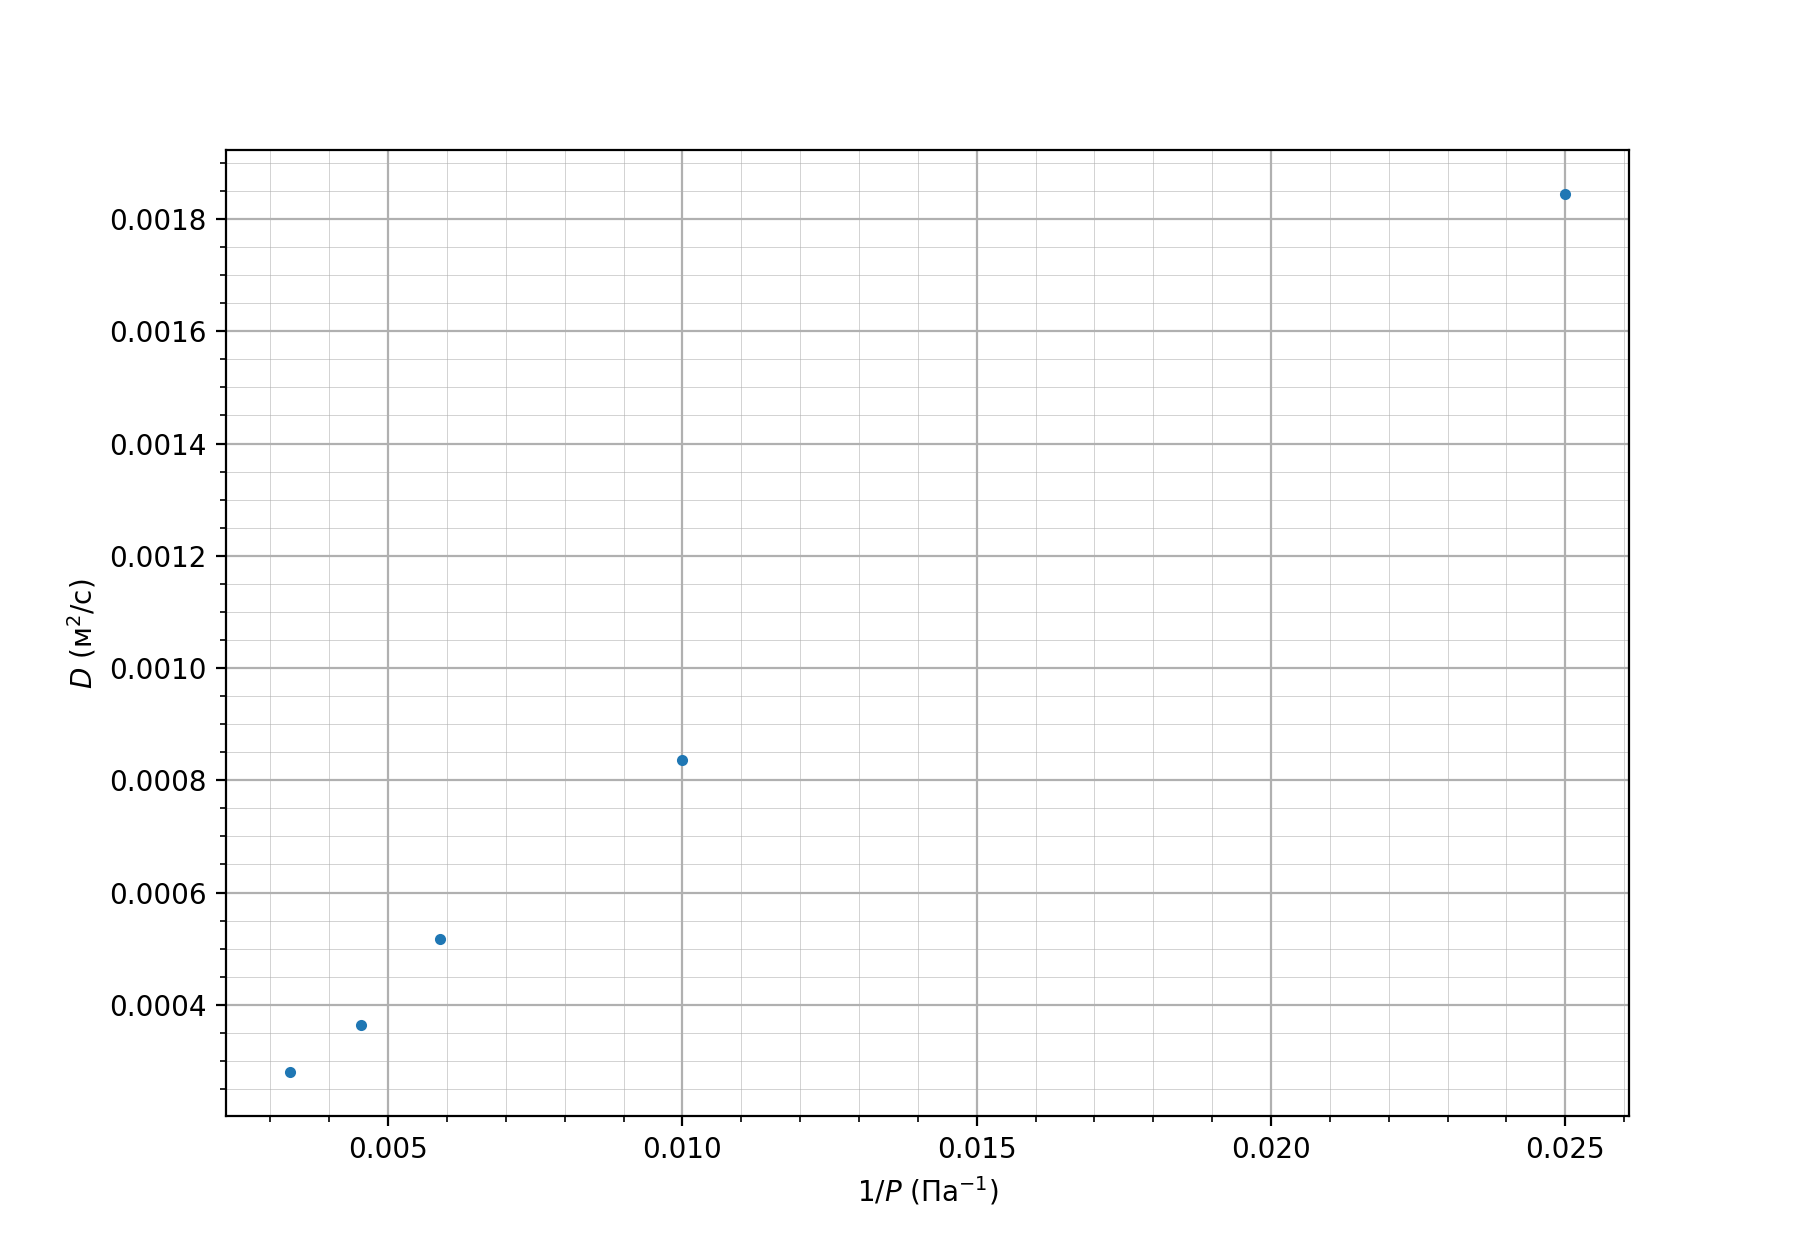

In [9]:
create_plot('$1/P$ (Па$^{-1})$', '$D$ (м$^2$/с)')
plt.plot([1/p for p in values], D, linestyle='', marker='.')

<IPython.core.display.Javascript object>


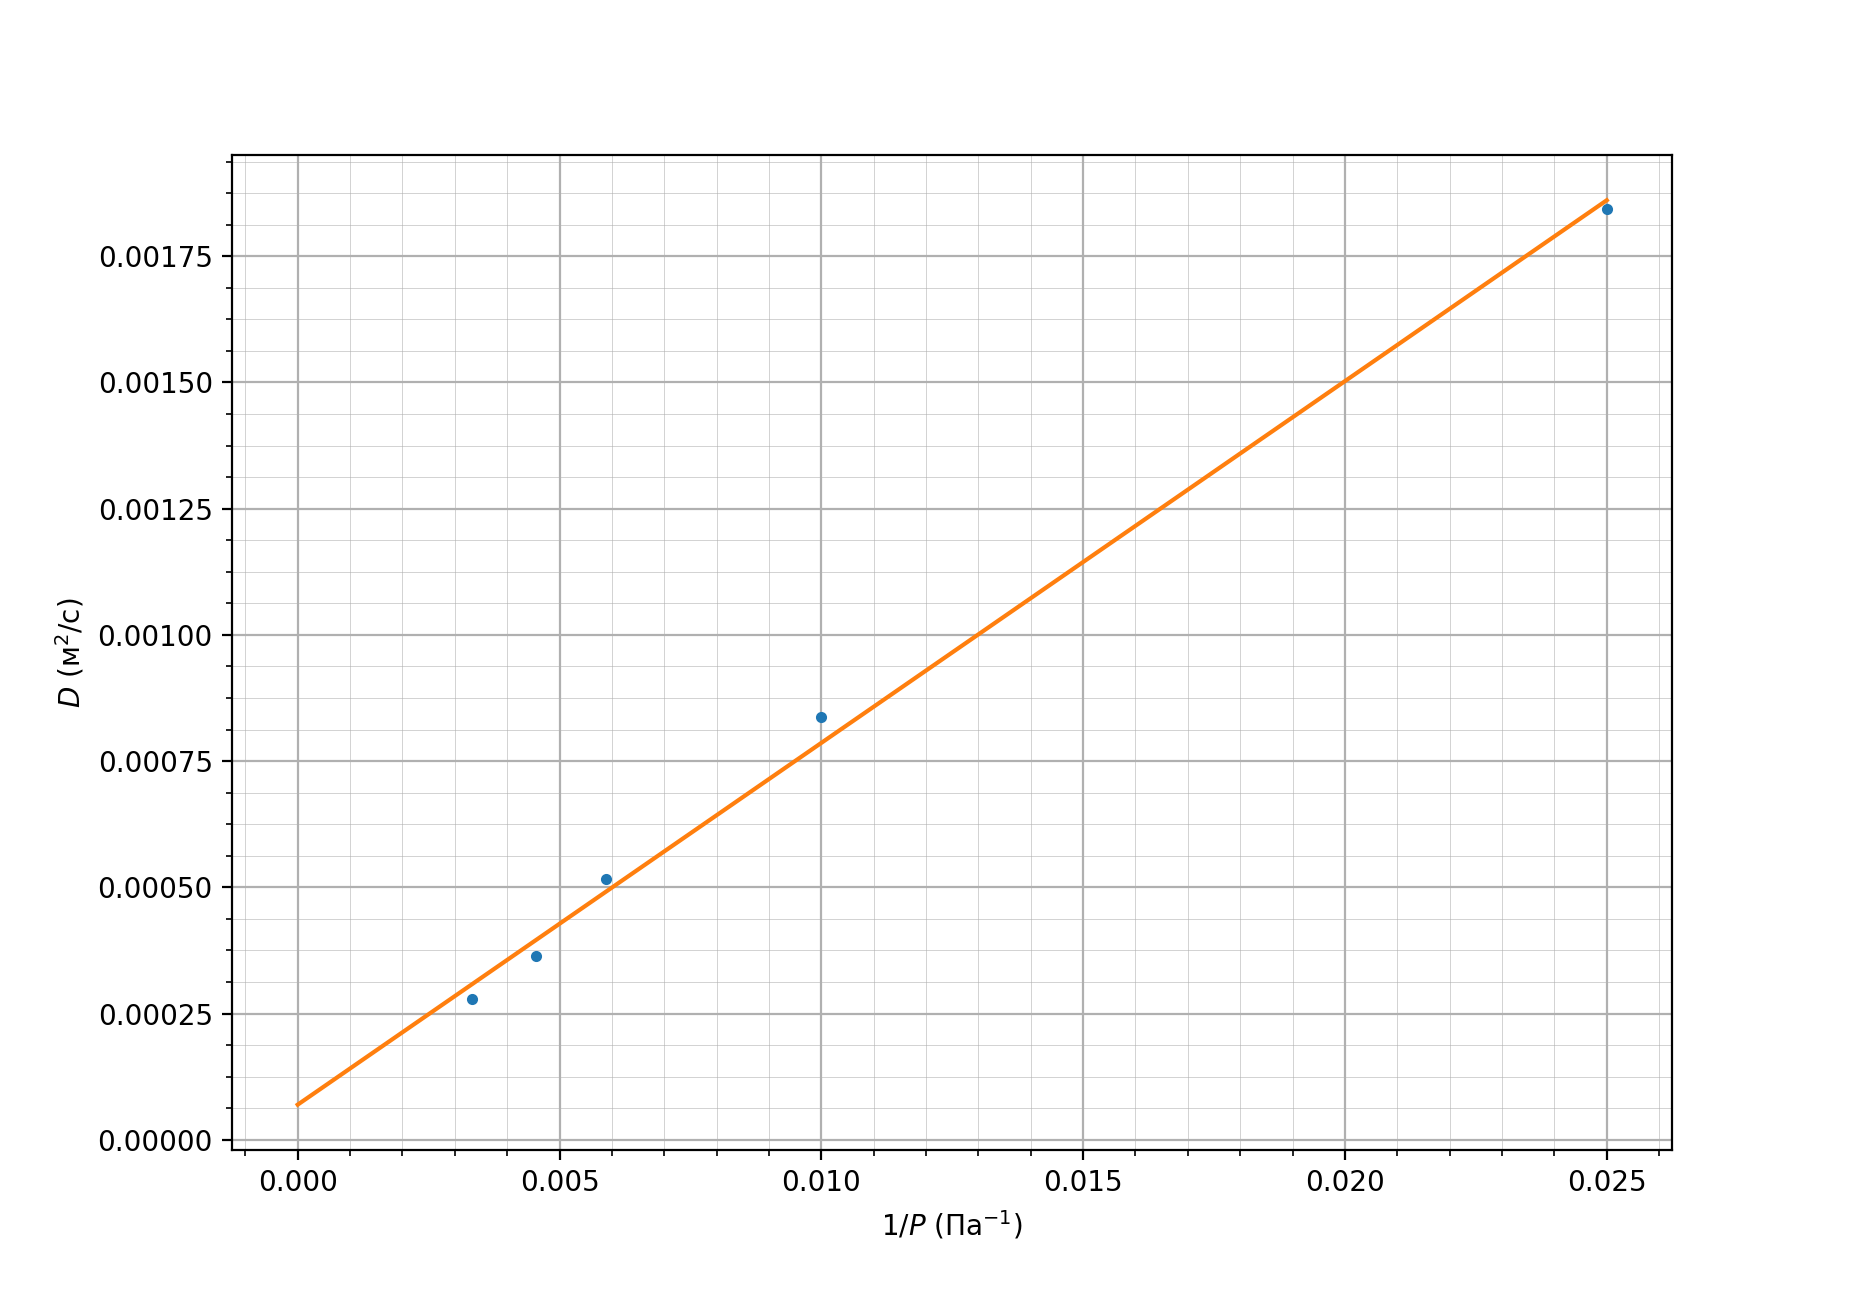

In [10]:
x = [1/p for p in values]
D_opt, D_cov = curve_fit(f, x, D)
create_plot('$1/P$ (Па$^{-1})$', '$D$ (м$^2$/с)')
plt.plot(x, D, linestyle='', marker='.')
x = np.arange(0, .026, .001)
plt.plot(x, f(x, *D_opt))

In [11]:
print(*D_opt)

0.07164296235943446 6.970020366142994e-05


$$D \approx \frac{0,072}{P} + 6,97\cdot 10^{-5}$$

In [12]:
D_0 = f(1e-5, *D_opt)
D_0

7.041663328502429e-05

$$D_0 \approx 7 \cdot 10^{-5}\ \frac{\text{м}^2}{\text{c}} \approx 0,7\ \frac{\text{см}^2}{\text{c}}$$

$$D = \frac{1}{3}\lambda\overline v_\text{He}$$

In [13]:
v_mean = math.sqrt(8 * 8.314 * 300 / (math.pi * 4e-3))
v_mean

1260.101994379511

$$\overline v_\text{He} = \sqrt{\frac{8RT}{\pi\mu_\text{He}}} \approx 1260 \ \frac{\text{м}}{\text{с}}$$

In [14]:
_lambda = 3 * D_0 / v_mean
_lambda

1.6764508015805083e-07

$$\lambda = \frac{3D}{\overline v_{He}} \approx 1,7 \cdot 10^{-7} \ \text{м}$$

In [15]:
n_0 = 2.5e25 # концентрация воздуха (плотность/масса молекулы)
sigma = 1 / (_lambda * n_0)
sigma

2.3859930731214526e-19

$$\sigma_{\text{He}-\text{возд}} = \frac{1}{\lambda n_0} \approx 2,4\cdot 10^{-19} \ \text{м}^2$$